Psuedocode:

1. Import packages
2. define the differential equation as a function
3. Define initial conditions and parameters
4. Use ivp solver to solve the differential equation
5. Plot the solutions with respect to time

In [32]:

# import packages

import numpy as np # imports the `numpy` package and gives it an alias/name `np`
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # imports the `solve_ivp` function from the `integrate` submodule of the `scipy` module


# define our differential equation

def rigid_pendulum_ode(t, y, omega_0=1):

 """

 Returns the time derivative of y=[theta, ang_vel] (the angle and angular velocity).

 """

 theta, ang_vel = y # unpacks y=[theta, ang_vel]
 dtheta_dt = ang_vel # define first derivative
 d2theta_dt2 = - omega_0 ** 2 * np.sin(theta) # define second derivative
 dy_dt = [dtheta_dt, d2theta_dt2] # define derivative of state variable
 return dy_dt

# Define the initial conditions, input parameters, and the time span
# initial conditions

theta_0 = np.pi # initial angle
ang_vel_0 = 0 # initial angular velocity
y_0 = [theta_0, ang_vel_0] # initial state
theta_02 = 0
ang_vel_02 = 2
y_02 = [theta_02, ang_vel_02] # initial state 2

# input parameters

omega_0 = 1 # natural frequency

# time span

t_initial = 0 # initial time
t_final = 100 # final time
t_span = [t_initial, t_final] # time span

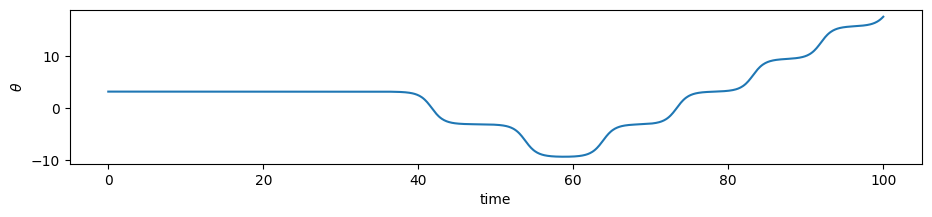

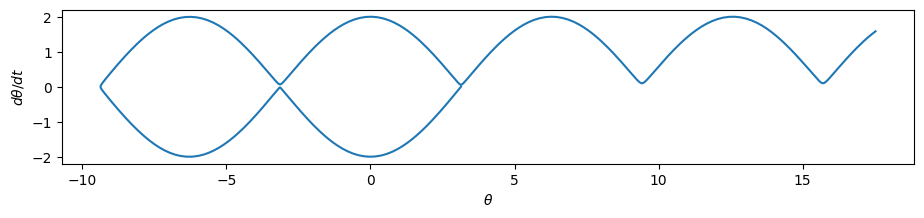

In [30]:
# solve differential equation

solution = solve_ivp(rigid_pendulum_ode,
 t_span, # time span to solve over
 y_0, # initial conditions
 args=(omega_0,), # passes `omega_0` to `rigid_pendulum_ode`
 dense_output=True, # returns an interpolated solution
 method='LSODA',
 rtol=1e-3,
 atol=1e-6
 )

#create list for plotting
n_steps = 1000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot = solution.sol(t_plot)[0] # evaluate the interpolant on a mesh for plotting
ang_vel_plot = solution.sol(t_plot)[1] # evaluate the interpolant on a mesh for plotting

#plot
plt.figure(figsize=(11,2))
plt.plot(t_plot, theta_plot)
plt.xlabel("time")
plt.ylabel("$\\theta$")
plt.show()

#plot ang vel
plt.figure(figsize=(11,2))
plt.plot(theta_plot, ang_vel_plot)
plt.xlabel("$\\theta$")
plt.ylabel("$d\\theta/dt$")
plt.show()

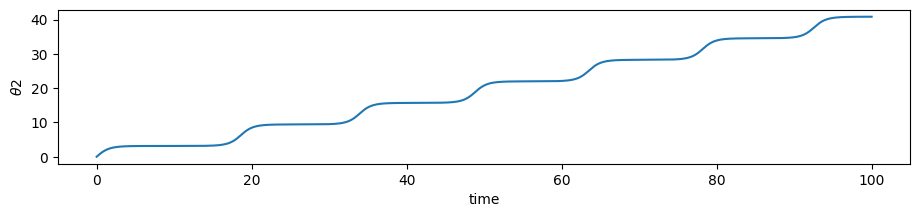

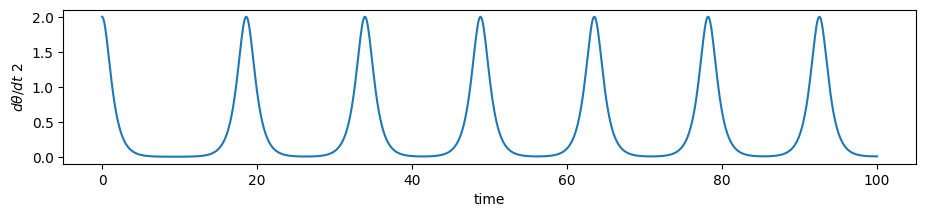

In [31]:
#solve diff eq
solution2 = solve_ivp(rigid_pendulum_ode,
  t_span,
  y_02,
  args=(omega_0,),
  dense_output=True,
  method='LSODA',
  rtol=1e-6,
  atol=1e-9,

  )

#list for plotting
n_steps = 1000 # number of time steps
t_plot = np.linspace(t_initial, t_final, n_steps) # list of times for plotting
theta_plot2 = solution2.sol(t_plot)[0]
ang_vel_plot2 = solution2.sol(t_plot)[1]

#plot theta vs time
plt.figure(figsize=(11,2))
plt.plot(t_plot, theta_plot2)
plt.xlabel("time")
plt.ylabel("$\\theta2$")
plt.show()

#plot theta prime vs time
plt.figure(figsize=(11,2))
plt.plot(t_plot, ang_vel_plot2)
plt.xlabel("time")
plt.ylabel("$d\\theta/dt$ 2")
plt.show()

For the solver I chose LSODA because it is supposed to be able to switch between a solver for 'stiff' and 'non-stiff' problems. Since I wasn't sure whether or not these are stiff or non-stiff, I decided LSODA was best. For the tolerances, I just assumed 1e-6, and 1e-9 should be good enough.